In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier

#### Target value 0 means Female and 1 means male

In [2]:
training_data=np.load("/content/drive/MyDrive/training_feat.npy")
test_data=np.load("/content/drive/MyDrive/testing_feat.npy")
training_labels=np.load("/content/drive/MyDrive/training_target.npy")
testing_labels=np.load("/content/drive/MyDrive/testing_target.npy")

In [ ]:
training_data.shape

(6000, 50176)

## WE ARE USING PCA TO REDUCE DIMENSIONALITY THAT WE USE IT FOR ONLY SVM AND LOGISTIC REGRESSOR MODEL.


In [3]:
pca20=PCA(n_components=20)

In [4]:
X_train=pca20.fit_transform(training_data)
X_test=pca20.fit_transform(test_data)

### K-NEAREST NEIGHBOURS CLASSIFIER

In [5]:
knn=KNeighborsClassifier(n_neighbors=20)
knn.fit(training_data,training_labels)

KNeighborsClassifier(n_neighbors=20)

In [ ]:
knn_ans=knn.predict(test_data)

In [ ]:
print(classification_report(testing_labels, knn_ans))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1500
           1       0.82      0.87      0.84      1500

    accuracy                           0.84      3000
   macro avg       0.84      0.84      0.84      3000
weighted avg       0.84      0.84      0.84      3000



In [ ]:
print('Accuracy: %.3f' % accuracy_score(testing_labels,knn_ans))

Accuracy: 0.839


In [ ]:
knn_cm=confusion_matrix(testing_labels, knn_ans)

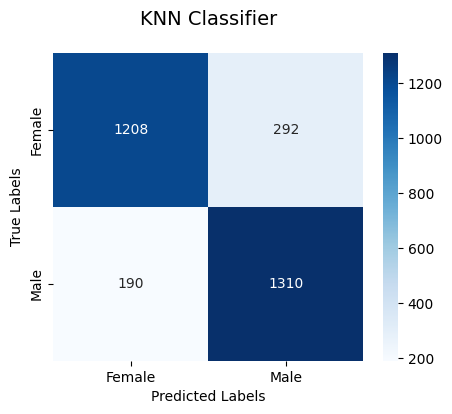

In [ ]:
fig, ax = plt.subplots(figsize=(5,4), dpi=100)
ax.set_title("KNN Classifier", fontsize=14, pad=20)
sns.heatmap(knn_cm, annot=True,fmt='d',xticklabels=["Female","Male"], yticklabels=["Female","Male"],cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('knn_cm.png', dpi=300, bbox_inches='tight')

### RANDOM FOREST CLASSIFIER

In [6]:
clf2= RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [7]:
clf2.fit(training_data,training_labels)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [ ]:
rf_ans2=clf2.predict(test_data)

In [ ]:
print(classification_report(testing_labels, rf_ans2))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85      1500
           1       0.83      0.90      0.86      1500

    accuracy                           0.86      3000
   macro avg       0.86      0.86      0.86      3000
weighted avg       0.86      0.86      0.86      3000



In [ ]:
fpr, tpr, thresholds = roc_curve(testing_labels, rf_ans2)
roc_auc = auc(fpr, tpr)
roc_auc

0.8593333333333334

In [ ]:
rf_cm=confusion_matrix(testing_labels, rf_ans2)

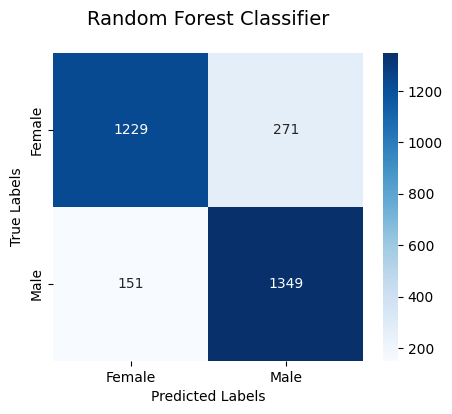

In [ ]:
fig, ax = plt.subplots(figsize=(5,4),dpi=100)
ax.set_title("Random Forest Classifier", fontsize=14, pad=20)
sns.heatmap(rf_cm, annot=True,fmt='d',xticklabels=["Female","Male"], yticklabels=["Female","Male"],cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('rf_cm.png', dpi=300, bbox_inches='tight')

### SUPPORT VECTOR CLASSIFIER

In [19]:
svm=SVC(C=1,kernel="rbf",probability=True)
svm.fit(X_train,training_labels)

SVC(C=1, probability=True)

In [ ]:
svm_ans=svm.predict(X_test)

In [ ]:
print(classification_report(testing_labels, svm_ans))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79      1500
           1       0.79      0.80      0.80      1500

    accuracy                           0.79      3000
   macro avg       0.79      0.79      0.79      3000
weighted avg       0.79      0.79      0.79      3000



In [ ]:
svm_cm=confusion_matrix(testing_labels, svm_ans)

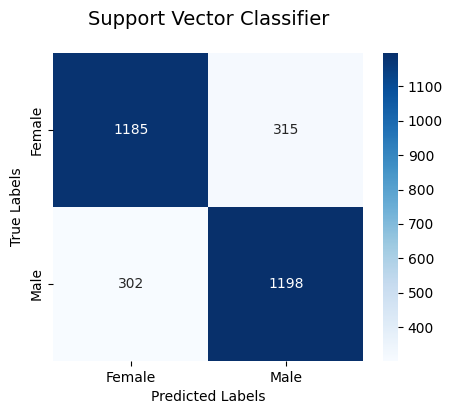

In [ ]:
fig, ax = plt.subplots(figsize=(5,4),dpi=100)
ax.set_title("Support Vector Classifier", fontsize=14, pad=20)
sns.heatmap(svm_cm, annot=True,fmt='d',xticklabels=["Female","Male"], yticklabels=["Female","Male"],cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('svm_cm.png', dpi=300, bbox_inches='tight')

### LOGISTICS REGRESSOR

In [9]:
lr=LogisticRegression(max_iter=1000).fit(X_train,training_labels)

In [ ]:
lr_ans=lr.predict(X_test)

In [ ]:
print(classification_report(testing_labels, lr_ans))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80      1500
           1       0.80      0.79      0.79      1500

    accuracy                           0.80      3000
   macro avg       0.80      0.80      0.79      3000
weighted avg       0.80      0.80      0.79      3000



In [ ]:
lr_cm=confusion_matrix(testing_labels, lr_ans)

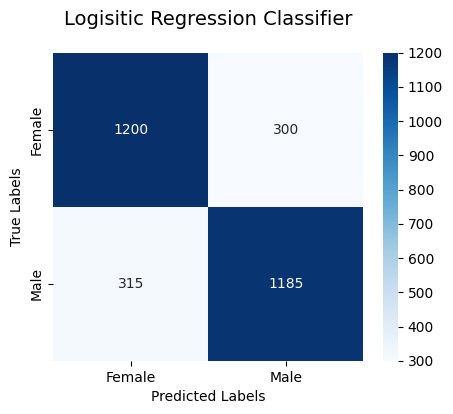

In [ ]:
fig, ax = plt.subplots(figsize=(5,4),dpi=100)
ax.set_title("Logisitic Regression Classifier", fontsize=14, pad=20)
sns.heatmap(lr_cm, annot=True,fmt='d',xticklabels=["Female","Male"], yticklabels=["Female","Male"],cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('lr_cm.png', dpi=300, bbox_inches='tight')

### FINDING PROBABILITIES OF PREDICTION TO PLOT ROC CURVE OF ALL CLASSIFIERS

In [16]:
knn_prob=knn.predict_proba(test_data)[:,-1]

In [17]:
rf_prob=clf2.predict_proba(test_data)[:,-1]

In [21]:
svm_prob=svm.predict_proba(X_test)[:,-1]

In [11]:
lr_prob=lr.predict_proba(X_test)[:,-1]

In [22]:
l_fpr, l_tpr, l_thresholds = roc_curve(testing_labels, lr_prob)
l_roc = auc(l_fpr, l_tpr)
l_roc

0.8800253333333334

In [23]:
k_fpr, k_tpr, k_thresholds = roc_curve(testing_labels, knn_prob)
k_roc = auc(k_fpr, k_tpr)
k_roc

0.9187462222222222

In [24]:
r_fpr, r_tpr, r_thresholds = roc_curve(testing_labels, rf_prob)
r_roc = auc(r_fpr, r_tpr)
r_roc

0.9424986666666667

In [25]:
s_fpr, s_tpr, s_thresholds = roc_curve(testing_labels, svm_prob)
s_roc = auc(s_fpr, s_tpr)
s_roc

0.8758637777777778

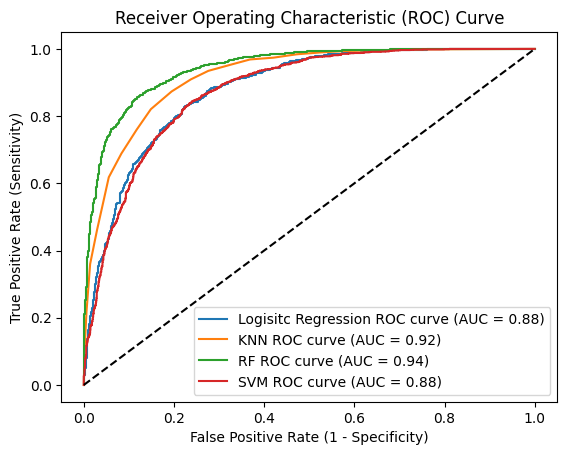

<Figure size 640x480 with 0 Axes>

In [35]:
plt.plot(l_fpr, l_tpr, label='Logisitc Regression ROC curve (AUC = %0.2f)' % l_roc)
plt.plot(k_fpr, k_tpr, label='KNN ROC curve (AUC = %0.2f)' % k_roc)
plt.plot(r_fpr, r_tpr, label='RF ROC curve (AUC = %0.2f)' % r_roc)
plt.plot(s_fpr, s_tpr, label='SVM ROC curve (AUC = %0.2f)' % s_roc)
plt.plot([0, 1], [0, 1], 'k--')  # random guessing line
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
plt.savefig('SF_ROC.png', dpi=300, bbox_inches='tight')